# Electricity

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'.csv')
output_names = ['Electricity Consumption']

from FDCS_2_Elec_pre_processing_SHAP import preprocess_data
X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data(df)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_train_val:", X_train_val.shape)
print("Shape of y_train_val:", y_train_val.shape)


Shape of X_train: (1800, 35)
Shape of y_train: (1800, 1)
Shape of X_val: (336, 35)
Shape of y_val: (336, 1)
Shape of X_test: (336, 35)
Shape of y_test: (336, 1)
Shape of X_train_val: (2136, 35)
Shape of y_train_val: (2136, 1)


Training XGBoost for 'Electricity Consumption' with best hyperparameters
Training time for 'Electricity Consumption' is 1.82 seconds.
MAE for 'Electricity Consumption': 398.8719
RMSE for 'Electricity Consumption': 532.1472
Computing SHAP values for Electricity Consumption...


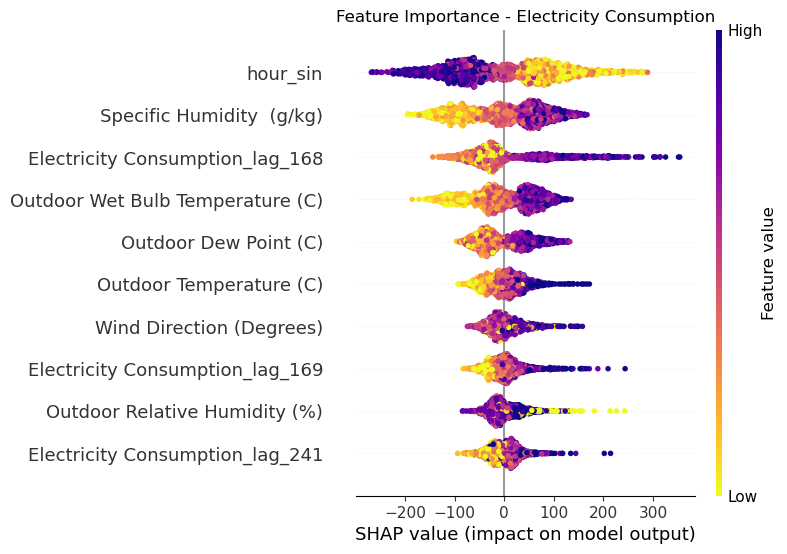

In [2]:
from xgboost import XGBRegressor
import time
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit  # Import TimeSeriesSplit
from IPython.display import display, Image
import matplotlib.image as mpimg
import pandas as pd

# Define best parameters for XGBoost
best_params = {'learning_rate': 0.01, 'max_depth': 20, 'min_child_weight': 10, 
                  'n_estimators': 500, 'subsample': 0.8}   

# Initialise lists to store models and predictions
trained_models = []
test_predictions_list = []
true_values_list = []  # Assuming you have a way to collect true values for each prediction

# Define Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Loop to train the model for each target/output column in y_train_val
for i in range(y_train_val.shape[1]):
    print(f"Training XGBoost for '{output_names[i]}' with best hyperparameters")
    
    # Time the training process
    start_time = time.time()
    
    model = XGBRegressor(**best_params)
    model.fit(X_train_val, y_train_val.iloc[:, i])
    
    # Append the trained model to the list
    trained_models.append(model)
    
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Training time for '{output_names[i]}' is {training_time:.2f} seconds.")
    
    # Predictions for test set
    predictions = model.predict(X_test)
    test_predictions_list.append(predictions)

    # Calculate and print MAE and RMSE
    mae = mean_absolute_error(y_test.iloc[:, i], predictions)
    rmse = sqrt(mean_squared_error(y_test.iloc[:, i], predictions))
    print(f"MAE for '{output_names[i]}': {mae:.4f}")
    print(f"RMSE for '{output_names[i]}': {rmse:.4f}")

# SHAP analysis
X_train_val_normalized_df = pd.DataFrame(X_train_val, columns=X_train_val.columns)
for i, model in enumerate(trained_models):
    print(f"Computing SHAP values for {output_names[i]}...")
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train_val_normalized_df)
    shap.summary_plot(shap_values.values, X_train_val_normalized_df, max_display=10, show=False,
                      cmap=plt.get_cmap("plasma_r"))
    plt.title(f"Feature Importance - {output_names[i]}")
    img_path = f'shap_plot_{output_names[i]}.png'  # Corrected file naming
    plt.savefig(img_path, bbox_inches='tight')
    plt.show()


# Temp

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'.csv')
output_names = ['Temperature Closer to Evaporator (C)']

from FDCS_2_Temp_pre_processing_SHAP import preprocess_data
X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data(df)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_train_val:", X_train_val.shape)
print("Shape of y_train_val:", y_train_val.shape)


Shape of X_train: (1800, 35)
Shape of y_train: (1800, 1)
Shape of X_val: (336, 35)
Shape of y_val: (336, 1)
Shape of X_test: (336, 35)
Shape of y_test: (336, 1)
Shape of X_train_val: (2136, 35)
Shape of y_train_val: (2136, 1)


Training XGBoost for 'Temperature Closer to Evaporator (C)' with best hyperparameters
Training time for 'Temperature Closer to Evaporator (C)' is 1.35 seconds.
MAE for 'Temperature Closer to Evaporator (C)': 0.4439
RMSE for 'Temperature Closer to Evaporator (C)': 0.6016
Computing SHAP values for Temperature Closer to Evaporator (C)...


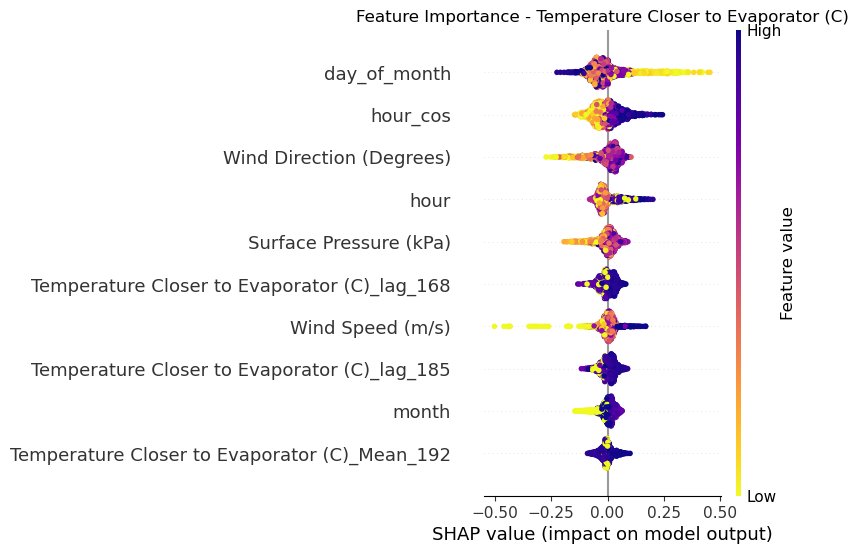

In [2]:
from xgboost import XGBRegressor
import time
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit  # Import TimeSeriesSplit
from IPython.display import display, Image
import matplotlib.image as mpimg
import pandas as pd

# Define best parameters for XGBoost
best_params = {'learning_rate': 0.01, 'max_depth': 20, 'min_child_weight': 10,
                  'n_estimators': 500, 'subsample': 0.8}   
# Initialise lists to store models and predictions
trained_models = []
test_predictions_list = []
true_values_list = []  # Assuming you have a way to collect true values for each prediction

# Define Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Loop to train the model for each target/output column in y_train_val
for i in range(y_train_val.shape[1]):
    print(f"Training XGBoost for '{output_names[i]}' with best hyperparameters")
    
    # Time the training process
    start_time = time.time()
    
    model = XGBRegressor(**best_params)
    model.fit(X_train_val, y_train_val.iloc[:, i])
    
    # Append the trained model to the list
    trained_models.append(model)
    
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Training time for '{output_names[i]}' is {training_time:.2f} seconds.")
    
    # Predictions for test set
    predictions = model.predict(X_test)
    test_predictions_list.append(predictions)

    # Calculate and print MAE and RMSE
    mae = mean_absolute_error(y_test.iloc[:, i], predictions)
    rmse = sqrt(mean_squared_error(y_test.iloc[:, i], predictions))
    print(f"MAE for '{output_names[i]}': {mae:.4f}")
    print(f"RMSE for '{output_names[i]}': {rmse:.4f}")

# SHAP analysis
X_train_val_normalized_df = pd.DataFrame(X_train_val, columns=X_train_val.columns)
for i, model in enumerate(trained_models):
    print(f"Computing SHAP values for {output_names[i]}...")
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train_val_normalized_df)
    shap.summary_plot(shap_values.values, X_train_val_normalized_df, max_display=10, show=False,
                      cmap=plt.get_cmap("plasma_r"))
    plt.title(f"Feature Importance - {output_names[i]}")
    img_path = f'shap_plot_{output_names[i]}.png'  # Corrected file naming
    plt.savefig(img_path, bbox_inches='tight')
    plt.show()


# Humidity

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'.csv')
output_names = ['Humidity Closer to Evaporator (%)']

from FDCS_2_Humd_pre_processing_SHAP import preprocess_data
X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data(df)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_train_val:", X_train_val.shape)
print("Shape of y_train_val:", y_train_val.shape)


Shape of X_train: (1800, 35)
Shape of y_train: (1800, 1)
Shape of X_val: (336, 35)
Shape of y_val: (336, 1)
Shape of X_test: (336, 35)
Shape of y_test: (336, 1)
Shape of X_train_val: (2136, 35)
Shape of y_train_val: (2136, 1)


Training XGBoost for 'Humidity Closer to Evaporator (%)' with best hyperparameters
Training time for 'Humidity Closer to Evaporator (%)' is 1.86 seconds.
MAE for 'Humidity Closer to Evaporator (%)': 3.1657
RMSE for 'Humidity Closer to Evaporator (%)': 4.1390
Computing SHAP values for Humidity Closer to Evaporator (%)...


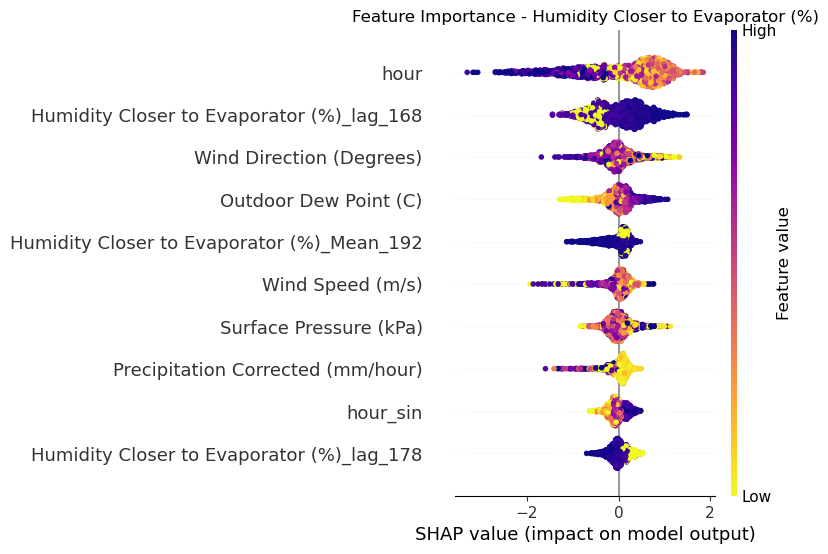

In [7]:
from xgboost import XGBRegressor
import time
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit  # Import TimeSeriesSplit
from IPython.display import display, Image
import matplotlib.image as mpimg
import pandas as pd

# Define best parameters for XGBoost
best_params = {'learning_rate': 0.01, 'max_depth': 20, 'min_child_weight': 10,
                  'n_estimators': 500, 'subsample': 0.8}   

# Initialise lists to store models and predictions
trained_models = []
test_predictions_list = []
true_values_list = []  # Assuming you have a way to collect true values for each prediction

# Define Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Loop to train the model for each target/output column in y_train_val
for i in range(y_train_val.shape[1]):
    print(f"Training XGBoost for '{output_names[i]}' with best hyperparameters")
    
    # Time the training process
    start_time = time.time()
    
    model = XGBRegressor(**best_params)
    model.fit(X_train_val, y_train_val.iloc[:, i])
    
    # Append the trained model to the list
    trained_models.append(model)
    
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Training time for '{output_names[i]}' is {training_time:.2f} seconds.")
    
    # Predictions for test set
    predictions = model.predict(X_test)
    test_predictions_list.append(predictions)

    # Calculate and print MAE and RMSE
    mae = mean_absolute_error(y_test.iloc[:, i], predictions)
    rmse = sqrt(mean_squared_error(y_test.iloc[:, i], predictions))
    print(f"MAE for '{output_names[i]}': {mae:.4f}")
    print(f"RMSE for '{output_names[i]}': {rmse:.4f}")

# SHAP analysis
X_train_val_normalized_df = pd.DataFrame(X_train_val, columns=X_train_val.columns)
for i, model in enumerate(trained_models):
    print(f"Computing SHAP values for {output_names[i]}...")
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train_val_normalized_df)
    shap.summary_plot(shap_values.values, X_train_val_normalized_df, max_display=10, show=False,
                      cmap=plt.get_cmap("plasma_r"))
    plt.title(f"Feature Importance - {output_names[i]}")
    img_path = f'shap_plot_{output_names[i]}.png'  # Corrected file naming
    plt.savefig(img_path, bbox_inches='tight')
    plt.show()
